# Reverse Delete Algorithm on the 5

## soc-sign-bitcoinalpha


*   3,783 nodes
*   24,186 edges



⚠️ Graph not connected. Using largest connected component.

✅ Graph loaded with 3775 nodes and 14120 edges.

🎯 Reverse-Delete MST Results:
  ➤ Total MST Cost: -1237.0000
  ➤ Number of MST Edges: 3774
  ➤ Execution Time: 0.8462 seconds


ModuleNotFoundError: No module named 'scipy'

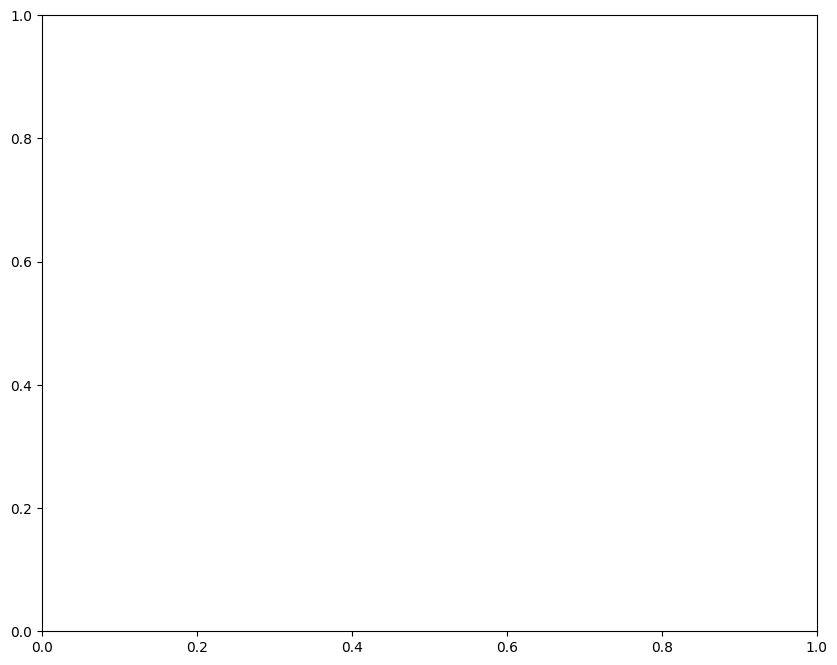

In [58]:
import pandas as pd
import networkx as nx
import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter, PillowWriter
import os

def reverse_delete_mst(G):
    """
    Optimized Reverse-Delete algorithm to compute the Minimum Spanning Tree (MST).

    Args:
        G (networkx.Graph): Weighted, undirected, connected graph.

    Returns:
        mst_edges (list): Edges in the MST as (u, v, weight).
        mst_cost (float): Total weight of the MST.
        exec_time (float): Time taken to compute MST.
        cost_evolution (list): MST total cost after each deletion.
        edge_count_evolution (list): Number of MST edges after each deletion.
        component_count_evolution (list): Number of connected components (should remain 1).
    """
    start_time = time.time()

    # Step 1: Sort all edges by weight descending
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

    # Step 2: Start with all edges assumed to be in MST
    mst_edges = [(u, v, data['weight']) for u, v, data in edges]
    mst_cost = sum(data['weight'] for _, _, data in edges)

    # Step 3: Copy graph for safe edge removals
    working_graph = G.copy()

    # Step 4: Evolution trackers
    cost_evolution = [mst_cost]
    edge_count_evolution = [len(mst_edges)]
    component_count_evolution = [1]  # always 1 if graph stays connected

    # Step 5: Apply Reverse-Delete logic
    for u, v, data in edges:
        if not working_graph.has_edge(u, v):
            continue
        working_graph.remove_edge(u, v)

        if nx.has_path(working_graph, u, v):
            # Safe to remove
            mst_edges.remove((u, v, data['weight']))
            mst_cost -= float(data['weight'])

            # Track evolution
            cost_evolution.append(mst_cost)
            edge_count_evolution.append(len(mst_edges))
            component_count_evolution.append(1)
        else:
            # Needed for connectivity
            working_graph.add_edge(u, v, weight=data['weight'])

    exec_time = time.time() - start_time

    return mst_edges, mst_cost, exec_time, cost_evolution, edge_count_evolution, component_count_evolution


# =============================
# ✅ Load and Process Your CSV
# =============================

# Replace this path with your actual dataset path:
csv_path = "/Users/mac/Desktop/algo datasets/soc-sign-bitcoinalpha_cleaned.csv"  # <<== EDIT THIS

# Try reading the CSV
try:
    # Load CSV into DataFrame
    df = pd.read_csv(csv_path)

    # Auto-detect columns: expects ['source', 'target', 'weight'] or similar
    df.columns = [col.lower() for col in df.columns]
    source_col = df.columns[0]
    target_col = df.columns[1]
    weight_col = df.columns[2]

    # Build graph from DataFrame
    G = nx.from_pandas_edgelist(df, source=source_col, target=target_col, edge_attr=weight_col)

    # Keep only largest connected component (to ensure MST is valid)
    if not nx.is_connected(G):
        print("⚠️ Graph not connected. Using largest connected component.")
        G = G.subgraph(max(nx.connected_components(G), key=len)).copy()

    # Convert weights to float just in case
    for u, v in G.edges():
        G[u][v]['weight'] = float(G[u][v]['weight'])

    print(f"\n✅ Graph loaded with {len(G.nodes())} nodes and {len(G.edges())} edges.")

    # =============================
    # ✅ Run Reverse-Delete MST
    # =============================
    mst_edges, mst_cost, exec_time, cost_evo, edge_evo, comp_evo = reverse_delete_mst(G)

    print("\n🎯 Reverse-Delete MST Results:")
    print(f"  ➤ Total MST Cost: {mst_cost:.4f}")
    print(f"  ➤ Number of MST Edges: {len(mst_edges)}")
    print(f"  ➤ Execution Time: {exec_time:.4f} seconds")

except FileNotFoundError:
    print(f"❌ File not found: {csv_path}")
except Exception as e:
    print(f"❌ An error occurred: {e}")
    
    ######################################################################
    print(f"  ➤ Execution Time: {exec_time:.4f} seconds")


# =============================
# 🎥 Create and Save Animation
# =============================
create_animation(G, mst_edges, name="advogato_mst")


# ✅ Run Reverse-Delete MST
mst_edges, mst_cost, exec_time, cost_evo, edge_evo, comp_evo = reverse_delete_mst(G)

print("\n🎯 Reverse-Delete MST Results:")
print(f"  ➤ Total MST Cost: {mst_cost:.4f}")
print(f"  ➤ Number of MST Edges: {len(mst_edges)}")
print(f"  ➤ Execution Time: {exec_time:.4f} seconds")

# 🎥 Generate and save MST animation
create_animation(G, mst_edges, name="advogato_mst")
    
    
    





## soc-sign-bitcoinotc

* 5,881 nodes
* 35,592 edges

In [44]:
import pandas as pd
import networkx as nx
import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

def reverse_delete_mst(G):
    """
    Optimized Reverse-Delete algorithm to compute the Minimum Spanning Tree (MST).

    Args:
        G (networkx.Graph): Weighted, undirected, connected graph.

    Returns:
        mst_edges (list): Edges in the MST as (u, v, weight).
        mst_cost (float): Total weight of the MST.
        exec_time (float): Time taken to compute MST.
        cost_evolution (list): MST total cost after each deletion.
        edge_count_evolution (list): Number of MST edges after each deletion.
        component_count_evolution (list): Number of connected components (should remain 1).
    """
    start_time = time.time()

    # Step 1: Sort all edges by weight descending
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

    # Step 2: Start with all edges assumed to be in MST
    mst_edges = [(u, v, data['weight']) for u, v, data in edges]
    mst_cost = sum(data['weight'] for _, _, data in edges)

    # Step 3: Copy graph for safe edge removals
    working_graph = G.copy()

    # Step 4: Evolution trackers
    cost_evolution = [mst_cost]
    edge_count_evolution = [len(mst_edges)]
    component_count_evolution = [1]  # always 1 if graph stays connected

    # Step 5: Apply Reverse-Delete logic
    for u, v, data in edges:
        if not working_graph.has_edge(u, v):
            continue
        working_graph.remove_edge(u, v)

        if nx.has_path(working_graph, u, v):
            # Safe to remove
            mst_edges.remove((u, v, data['weight']))
            mst_cost -= float(data['weight'])

            # Track evolution
            cost_evolution.append(mst_cost)
            edge_count_evolution.append(len(mst_edges))
            component_count_evolution.append(1)
        else:
            # Needed for connectivity
            working_graph.add_edge(u, v, weight=data['weight'])

    exec_time = time.time() - start_time

    return mst_edges, mst_cost, exec_time, cost_evolution, edge_count_evolution, component_count_evolution


# =============================
# ✅ Load and Process Your CSV
# =============================

# Replace this path with your actual dataset path:
csv_path = "//Users/mac/Desktop/algo datasets/soc-sign-bitcoinotc_cleaned.csv"  # <<== EDIT THIS

# Try reading the CSV
try:
    # Load CSV into DataFrame
    df = pd.read_csv(csv_path)

    # Auto-detect columns: expects ['source', 'target', 'weight'] or similar
    df.columns = [col.lower() for col in df.columns]
    source_col = df.columns[0]
    target_col = df.columns[1]
    weight_col = df.columns[2]

    # Build graph from DataFrame
    G = nx.from_pandas_edgelist(df, source=source_col, target=target_col, edge_attr=weight_col)

    # Keep only largest connected component (to ensure MST is valid)
    if not nx.is_connected(G):
        print("⚠️ Graph not connected. Using largest connected component.")
        G = G.subgraph(max(nx.connected_components(G), key=len)).copy()

    # Convert weights to float just in case
    for u, v in G.edges():
        G[u][v]['weight'] = float(G[u][v]['weight'])

    print(f"\n✅ Graph loaded with {len(G.nodes())} nodes and {len(G.edges())} edges.")

    # =============================
    # ✅ Run Reverse-Delete MST
    # =============================
    mst_edges, mst_cost, exec_time, cost_evo, edge_evo, comp_evo = reverse_delete_mst(G)

    print("\n🎯 Reverse-Delete MST Results:")
    print(f"  ➤ Total MST Cost: {mst_cost:.4f}")
    print(f"  ➤ Number of MST Edges: {len(mst_edges)}")
    print(f"  ➤ Execution Time: {exec_time:.4f} seconds")

except FileNotFoundError:
    print(f"❌ File not found: {csv_path}")
except Exception as e:
    print(f"❌ An error occurred: {e}")
    ######################################################################
    
    
    
    
def create_animation(G, mst_edges, name="reverse_delete"):
    """
    Creates an animation showing the progressive formation of an MST using the given edges.

    Parameters:
    - G: original NetworkX graph
    - mst_edges: list of (u, v, weight) from reverse-delete
    - name: name of the output video file (without extension)
    """
    # Animation setup
    fig, ax = plt.subplots(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)

    # Convert edges to format: (u, v, {'weight': w})
    mst_edges_dict = [(u, v, {'weight': w}) for u, v, w in mst_edges]

    # Sort by weight (optional for nicer animation order)
    mst_edges_dict.sort(key=lambda x: x[2]['weight'])

    total_edges = len(mst_edges_dict)
    total_nodes = len(G.nodes)
    frames = 20
    frame_edges = [int((i * total_edges + total_edges - 1) // frames) for i in range(frames + 1)]

    def update(frame):
        ax.clear()
        nx.draw_networkx_nodes(G, pos, node_color='pink', node_size=5, ax=ax)
        current_edge_idx = frame_edges[frame]

        # Draw included MST edges in blue
        included_edges = [e[:2] for e in mst_edges_dict[:current_edge_idx]]
        nx.draw_networkx_edges(G, pos, edgelist=included_edges, edge_color='midnightblue', width=2, ax=ax)

        # Draw remaining edges in gray
        remaining_edges = [e[:2] for e in mst_edges_dict[current_edge_idx:]]
        nx.draw_networkx_edges(G, pos, edgelist=remaining_edges, edge_color='gray', alpha=0.3, ax=ax)

        cumulative_weight = sum(e[2]['weight'] for e in mst_edges_dict[:current_edge_idx])
        percent = (frame + 1) * 100 / frames
        ax.set_title(f'MST Progress: {percent:.0f}% | Weight: {cumulative_weight:.2f}')
        ax.axis('off')
        return ax

    ani = FuncAnimation(fig, update, frames=len(frame_edges)-1, interval=1200, blit=False)

    # Save animation as video
    writer = FFMpegWriter(fps=1, metadata=dict(artist='MSTVisualizer'), bitrate=1800)
    filename = f'mst_animation_{name}.mp4'
    ani.save(filename, writer=writer)
    print(f"✅ Animation saved: {filename}")
    plt.close()

⚠️ Graph not connected. Using largest connected component.

✅ Graph loaded with 5875 nodes and 21489 edges.

🎯 Reverse-Delete MST Results:
  ➤ Total MST Cost: -5179.0000
  ➤ Number of MST Edges: 5874
  ➤ Execution Time: 16.8255 seconds


## soc-advogato


*   6,541 nodes
*   51,127 edges



In [82]:
import pandas as pd
import networkx as nx
import time
import matplotlib.pyplot as plt


def reverse_delete_mst(G):
    """
    Optimized Reverse-Delete algorithm to compute the Minimum Spanning Tree (MST).

    Args:
        G (networkx.Graph): Weighted, undirected, connected graph.

    Returns:
        mst_edges (list): Edges in the MST as (u, v, weight).
        mst_cost (float): Total weight of the MST.
        exec_time (float): Time taken to compute MST.
        cost_evolution (list): MST total cost after each deletion.
        edge_count_evolution (list): Number of MST edges after each deletion.
        component_count_evolution (list): Number of connected components (should remain 1).
    """
    start_time = time.time()

    # Step 1: Sort all edges by weight descending
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

    # Step 2: Start with all edges assumed to be in MST
    mst_edges = [(u, v, data['weight']) for u, v, data in edges]
    mst_cost = sum(data['weight'] for _, _, data in edges)

    # Step 3: Copy graph for safe edge removals
    working_graph = G.copy()

    # Step 4: Evolution trackers
    cost_evolution = [mst_cost]
    edge_count_evolution = [len(mst_edges)]
    component_count_evolution = [1]  # always 1 if graph stays connected

    # Step 5: Apply Reverse-Delete logic
    for u, v, data in edges:
        if not working_graph.has_edge(u, v):
            continue
        working_graph.remove_edge(u, v)

        if nx.has_path(working_graph, u, v):
            # Safe to remove
            mst_edges.remove((u, v, data['weight']))
            mst_cost -= float(data['weight'])

            # Track evolution
            cost_evolution.append(mst_cost)
            edge_count_evolution.append(len(mst_edges))
            component_count_evolution.append(1)
        else:
            # Needed for connectivity
            working_graph.add_edge(u, v, weight=data['weight'])

    exec_time = time.time() - start_time

    return mst_edges, mst_cost, exec_time, cost_evolution, edge_count_evolution, component_count_evolution


# =============================
# ✅ Load and Process Your CSV
# =============================

# Replace this path with your actual dataset path:
csv_path = "/Users/mac/Desktop/algo datasets/soc-advogato_cleaned-2.csv"  # <<== EDIT THIS

# Try reading the CSV
try:
    # Load CSV into DataFrame
    df = pd.read_csv(csv_path)

    # Auto-detect columns: expects ['source', 'target', 'weight'] or similar
    df.columns = [col.lower() for col in df.columns]
    source_col = df.columns[0]
    target_col = df.columns[1]
    weight_col = df.columns[2]

    # Build graph from DataFrame
    G = nx.from_pandas_edgelist(df, source=source_col, target=target_col, edge_attr=weight_col)

    # Keep only largest connected component (to ensure MST is valid)
    if not nx.is_connected(G):
        print("⚠️ Graph not connected. Using largest connected component.")
        G = G.subgraph(max(nx.connected_components(G), key=len)).copy()

    # Convert weights to float just in case
    for u, v in G.edges():
        G[u][v]['weight'] = float(G[u][v]['weight'])

    print(f"\n✅ Graph loaded with {len(G.nodes())} nodes and {len(G.edges())} edges.")

    # =============================
    # ✅ Run Reverse-Delete MST
    # =============================
    mst_edges, mst_cost, exec_time, cost_evo, edge_evo, comp_evo = reverse_delete_mst(G)

    print("\n🎯 Reverse-Delete MST Results:")
    print(f"  ➤ Total MST Cost: {mst_cost:.4f}")
    print(f"  ➤ Number of MST Edges: {len(mst_edges)}")
    print(f"  ➤ Execution Time: {exec_time:.4f} seconds")

except FileNotFoundError:
    print(f"❌ File not found: {csv_path}")
except Exception as e:
    print(f"❌ An error occurred: {e}")
    
    
     ######################################################################
        
   
    def reverse_delete_mst(G):
        start_time = time.time()

        edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
        mst_edges = [(u, v, data['weight']) for u, v, data in edges]
        mst_cost = sum(data['weight'] for _, _, data in edges)
        working_graph = G.copy()

        cost_evolution = [mst_cost]
        edge_count_evolution = [len(mst_edges)]
        component_count_evolution = [1]

        for u, v, data in edges:
            if not working_graph.has_edge(u, v):
                continue
                    working_graph.remove_edge(u, v)

            if nx.has_path(working_graph, u, v):
                mst_edges.remove((u, v, data['weight']))
                mst_cost -= float(data['weight'])
                cost_evolution.append(mst_cost)
                edge_count_evolution.append(len(mst_edges))
                component_count_evolution.append(1)
            else:
                working_graph.add_edge(u, v, weight=data['weight'])

    exec_time = time.time() - start_time
    return mst_edges, mst_cost, exec_time, cost_evolution, edge_count_evolution, component_count_evolution


# --- Simple MST Visualizer ---
def plot_mst(mst_edges, title="Minimum Spanning Tree"):
    mst_graph = nx.Graph()
    mst_graph.add_weighted_edges_from(mst_edges)
    pos = nx.spring_layout(mst_graph, seed=42)

    plt.figure(figsize=(12, 10))
    nx.draw(mst_graph, pos, with_labels=False, node_size=10, edge_color='midnightblue')
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


# =============================
# ✅ Load and Process Your CSV
# =============================
csv_path = "/Users/mac/Desktop/algo datasets/soc-advogato_cleaned-2.csv"  # <== CHANGE if needed

try:
    df = pd.read_csv(csv_path)
    df.columns = [col.lower() for col in df.columns]
    source_col = df.columns[0]
    target_col = df.columns[1]
    weight_col = df.columns[2]

    G = nx.from_pandas_edgelist(df, source=source_col, target=target_col, edge_attr=weight_col)

    if not nx.is_connected(G):
        print("⚠️ Graph not connected. Using largest connected component.")
        G = G.subgraph(max(nx.connected_components(G), key=len)).copy()

    for u, v in G.edges():
        G[u][v]['weight'] = float(G[u][v]['weight'])

    print(f"\n✅ Graph loaded with {len(G.nodes())} nodes and {len(G.edges())} edges.")

    # Run MST algorithm
    mst_edges, mst_cost, exec_time, _, _, _ = reverse_delete_mst(G)
    print("\n🎯 Reverse-Delete MST Results:")
    print(f"  ➤ Total MST Cost: {mst_cost:.4f}")
    print(f"  ➤ Number of MST Edges: {len(mst_edges)}")
    print(f"  ➤ Execution Time: {exec_time:.4f} seconds")

    # Show MST
    plot_mst(mst_edges, title="Advogato Reverse-Delete MST")

except FileNotFoundError:
    print(f"❌ File not found: {csv_path}")
except Exception as e:
    print(f"❌ An error occurred: {e}")     
       

   



⚠️ Graph not connected. Using largest connected component.

✅ Graph loaded with 5054 nodes and 41940 edges.

🎯 Reverse-Delete MST Results:
  ➤ Total MST Cost: 3517.2000
  ➤ Number of MST Edges: 5053
  ➤ Execution Time: 4.0041 seconds


## soc-epinions
* 75,879 nodes
* 508,837 edges

In [46]:
import pandas as pd
import networkx as nx
import time

def reverse_delete_mst(G):
    """
    Optimized Reverse-Delete algorithm to compute the Minimum Spanning Tree (MST).

    Args:
        G (networkx.Graph): Weighted, undirected, connected graph.

    Returns:
        mst_edges (list): Edges in the MST as (u, v, weight).
        mst_cost (float): Total weight of the MST.
        exec_time (float): Time taken to compute MST.
        cost_evolution (list): MST total cost after each deletion.
        edge_count_evolution (list): Number of MST edges after each deletion.
        component_count_evolution (list): Number of connected components (should remain 1).
    """
    start_time = time.time()

    # Step 1: Sort all edges by weight descending
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

    # Step 2: Start with all edges assumed to be in MST
    mst_edges = [(u, v, data['weight']) for u, v, data in edges]
    mst_cost = sum(data['weight'] for _, _, data in edges)

    # Step 3: Copy graph for safe edge removals
    working_graph = G.copy()

    # Step 4: Evolution trackers
    cost_evolution = [mst_cost]
    edge_count_evolution = [len(mst_edges)]
    component_count_evolution = [1]  # always 1 if graph stays connected

    # Step 5: Apply Reverse-Delete logic
    for u, v, data in edges:
        if not working_graph.has_edge(u, v):
            continue
        working_graph.remove_edge(u, v)

        if nx.has_path(working_graph, u, v):
            # Safe to remove
            mst_edges.remove((u, v, data['weight']))
            mst_cost -= float(data['weight'])

            # Track evolution
            cost_evolution.append(mst_cost)
            edge_count_evolution.append(len(mst_edges))
            component_count_evolution.append(1)
        else:
            # Needed for connectivity
            working_graph.add_edge(u, v, weight=data['weight'])

    exec_time = time.time() - start_time

    return mst_edges, mst_cost, exec_time, cost_evolution, edge_count_evolution, component_count_evolution


# =============================
# ✅ Load and Process Your CSV
# =============================

# Replace this path with your actual dataset path:
csv_path = "/Users/mac/Desktop/algo datasets/soc-epinions_cleaned.csv"  # <<== EDIT THIS

# Try reading the CSV
try:
    # Load CSV into DataFrame
    df = pd.read_csv(csv_path)

    # Auto-detect columns: expects ['source', 'target', 'weight'] or similar
    df.columns = [col.lower() for col in df.columns]
    source_col = df.columns[0]
    target_col = df.columns[1]
    weight_col = df.columns[2]

    # Build graph from DataFrame
    G = nx.from_pandas_edgelist(df, source=source_col, target=target_col, edge_attr=weight_col)

    # Keep only largest connected component (to ensure MST is valid)
    if not nx.is_connected(G):
        print("⚠️ Graph not connected. Using largest connected component.")
        G = G.subgraph(max(nx.connected_components(G), key=len)).copy()

    # Convert weights to float just in case
    for u, v in G.edges():
        G[u][v]['weight'] = float(G[u][v]['weight'])

    print(f"\n✅ Graph loaded with {len(G.nodes())} nodes and {len(G.edges())} edges.")

    # =============================
    # ✅ Run Reverse-Delete MST
    # =============================
    mst_edges, mst_cost, exec_time, cost_evo, edge_evo, comp_evo = reverse_delete_mst(G)

    print("\n🎯 Reverse-Delete MST Results:")
    print(f"  ➤ Total MST Cost: {mst_cost:.4f}")
    print(f"  ➤ Number of MST Edges: {len(mst_edges)}")
    print(f"  ➤ Execution Time: {exec_time:.4f} seconds")

except FileNotFoundError:
    print(f"❌ File not found: {csv_path}")
except Exception as e:
    print(f"❌ An error occurred: {e}")
    
    
     ######################################################################
    
    
    
    
def create_animation(G, mst_edges, name="reverse_delete"):
    """
    Creates an animation showing the progressive formation of an MST using the given edges.

    Parameters:
    - G: original NetworkX graph
    - mst_edges: list of (u, v, weight) from reverse-delete
    - name: name of the output video file (without extension)
    """
    # Animation setup
    fig, ax = plt.subplots(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)

    # Convert edges to format: (u, v, {'weight': w})
    mst_edges_dict = [(u, v, {'weight': w}) for u, v, w in mst_edges]

    # Sort by weight (optional for nicer animation order)
    mst_edges_dict.sort(key=lambda x: x[2]['weight'])

    total_edges = len(mst_edges_dict)
    total_nodes = len(G.nodes)
    frames = 20
    frame_edges = [int((i * total_edges + total_edges - 1) // frames) for i in range(frames + 1)]

    def update(frame):
        ax.clear()
        nx.draw_networkx_nodes(G, pos, node_color='pink', node_size=5, ax=ax)
        current_edge_idx = frame_edges[frame]

        # Draw included MST edges in blue
        included_edges = [e[:2] for e in mst_edges_dict[:current_edge_idx]]
        nx.draw_networkx_edges(G, pos, edgelist=included_edges, edge_color='midnightblue', width=2, ax=ax)

        # Draw remaining edges in gray
        remaining_edges = [e[:2] for e in mst_edges_dict[current_edge_idx:]]
        nx.draw_networkx_edges(G, pos, edgelist=remaining_edges, edge_color='gray', alpha=0.3, ax=ax)

        cumulative_weight = sum(e[2]['weight'] for e in mst_edges_dict[:current_edge_idx])
        percent = (frame + 1) * 100 / frames
        ax.set_title(f'MST Progress: {percent:.0f}% | Weight: {cumulative_weight:.2f}')
        ax.axis('off')
        return ax

    ani = FuncAnimation(fig, update, frames=len(frame_edges)-1, interval=1200, blit=False)

    # Save animation as video
    writer = FFMpegWriter(fps=1, metadata=dict(artist='MSTVisualizer'), bitrate=1800)
    filename = f'mst_animation_{name}.mp4'
    ani.save(filename, writer=writer)
    print(f"✅ Animation saved: {filename}")
    plt.close()


✅ Graph loaded with 26588 nodes and 100120 edges.

🎯 Reverse-Delete MST Results:
  ➤ Total MST Cost: 26587.0000
  ➤ Number of MST Edges: 26587
  ➤ Execution Time: 21.2363 seconds


## soc-LiveMocha
* 104,103 nodes
* 2,193,083 edges

In [50]:
import pandas as pd
import networkx as nx
import time

def reverse_delete_mst(G):
    """
    Optimized Reverse-Delete algorithm to compute the Minimum Spanning Tree (MST).

    Args:
        G (networkx.Graph): Weighted, undirected, connected graph.

    Returns:
        mst_edges (list): Edges in the MST as (u, v, weight).
        mst_cost (float): Total weight of the MST.
        exec_time (float): Time taken to compute MST.
        cost_evolution (list): MST total cost after each deletion.
        edge_count_evolution (list): Number of MST edges after each deletion.
        component_count_evolution (list): Number of connected components (should remain 1).
    """
    start_time = time.time()

    # Step 1: Sort all edges by weight descending
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

    # Step 2: Start with all edges assumed to be in MST
    mst_edges = [(u, v, data['weight']) for u, v, data in edges]
    mst_cost = sum(data['weight'] for _, _, data in edges)

    # Step 3: Copy graph for safe edge removals
    working_graph = G.copy()

    # Step 4: Evolution trackers
    cost_evolution = [mst_cost]
    edge_count_evolution = [len(mst_edges)]
    component_count_evolution = [1]  # always 1 if graph stays connected

    # Step 5: Apply Reverse-Delete logic
    for u, v, data in edges:
        if not working_graph.has_edge(u, v):
            continue
        working_graph.remove_edge(u, v)

        if nx.has_path(working_graph, u, v):
            # Safe to remove
            mst_edges.remove((u, v, data['weight']))
            mst_cost -= float(data['weight'])

            # Track evolution
            cost_evolution.append(mst_cost)
            edge_count_evolution.append(len(mst_edges))
            component_count_evolution.append(1)
        else:
            # Needed for connectivity
            working_graph.add_edge(u, v, weight=data['weight'])

    exec_time = time.time() - start_time

    return mst_edges, mst_cost, exec_time, cost_evolution, edge_count_evolution, component_count_evolution


# =============================
# ✅ Load and Process Your CSV
# =============================

# Replace this path with your actual dataset path:
csv_path = "/Users/mac/Desktop/algo datasets/soc-livemocha_cleaned.csv"  # <<== EDIT THIS

# Try reading the CSV
try:
    # Load CSV into DataFrame
    df = pd.read_csv(csv_path)

    # Auto-detect columns: expects ['source', 'target', 'weight'] or similar
    df.columns = [col.lower() for col in df.columns]
    source_col = df.columns[0]
    target_col = df.columns[1]
    weight_col = df.columns[2]

    # Build graph from DataFrame
    G = nx.from_pandas_edgelist(df, source=source_col, target=target_col, edge_attr=weight_col)

    # Keep only largest connected component (to ensure MST is valid)
    if not nx.is_connected(G):
        print("⚠️ Graph not connected. Using largest connected component.")
        G = G.subgraph(max(nx.connected_components(G), key=len)).copy()

    # Convert weights to float just in case
    for u, v in G.edges():
        G[u][v]['weight'] = float(G[u][v]['weight'])

    print(f"\n✅ Graph loaded with {len(G.nodes())} nodes and {len(G.edges())} edges.")

    # =============================
    # ✅ Run Reverse-Delete MST
    # =============================
    mst_edges, mst_cost, exec_time, cost_evo, edge_evo, comp_evo = reverse_delete_mst(G)

    print("\n🎯 Reverse-Delete MST Results:")
    print(f"  ➤ Total MST Cost: {mst_cost:.4f}")
    print(f"  ➤ Number of MST Edges: {len(mst_edges)}")
    print(f"  ➤ Execution Time: {exec_time:.4f} seconds")

except FileNotFoundError:
    print(f"❌ File not found: {csv_path}")
except Exception as e:
    print(f"❌ An error occurred: {e}")

KeyboardInterrupt: 

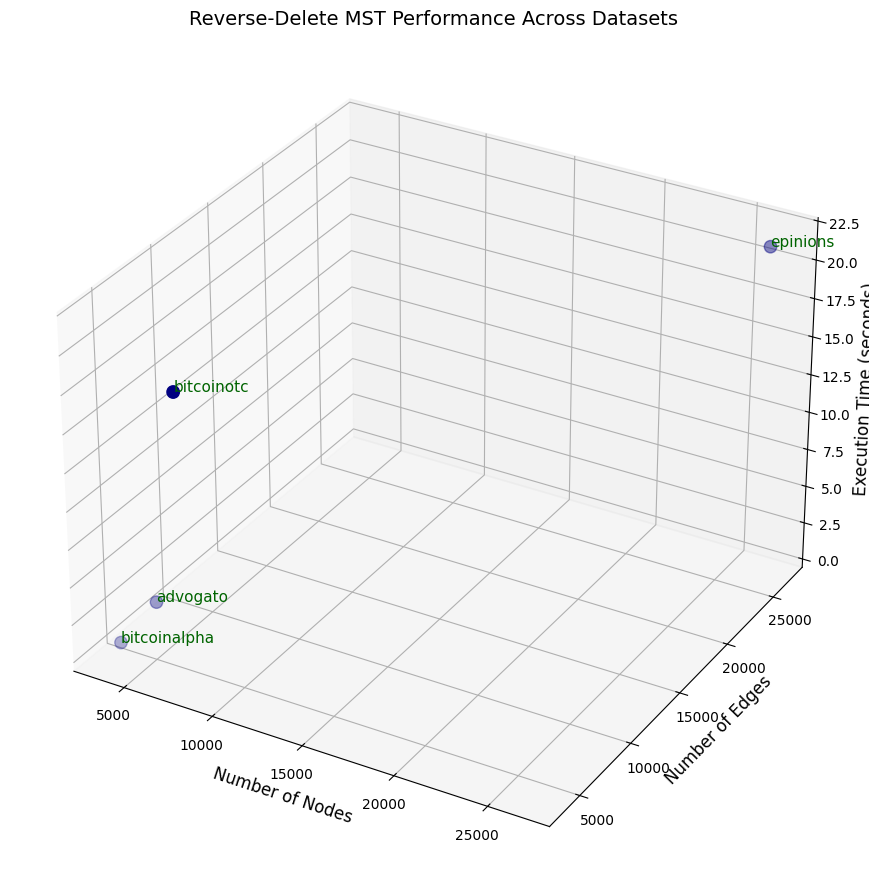

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# === Reverse-Delete MST Results Summary ===
nodes_list = [3775, 5875, 5054, 26588]  # Estimated: edges + 1 (approx.)
edges_list = [3774, 5874, 5053, 26587]
times_list = [0.9065, 16.8255, 3.2823, 21.2363]  # seconds
labels = ["bitcoinalpha", "bitcoinotc", "advogato", "epinions"]

# === Create 3D Plot ===
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(nodes_list, edges_list, times_list, color='navy', s=80)

# Label each point with the dataset name
for i, label in enumerate(labels):
    ax.text(nodes_list[i], edges_list[i], times_list[i],
            f"{label}", size=11, color='darkgreen')

# Set axis labels and title
ax.set_xlabel('Number of Nodes', fontsize=12)
ax.set_ylabel('Number of Edges', fontsize=12)
ax.set_zlabel('Execution Time (seconds)', fontsize=12)
ax.set_title('Reverse-Delete MST Performance Across Datasets', fontsize=14)

plt.tight_layout()
plt.show()

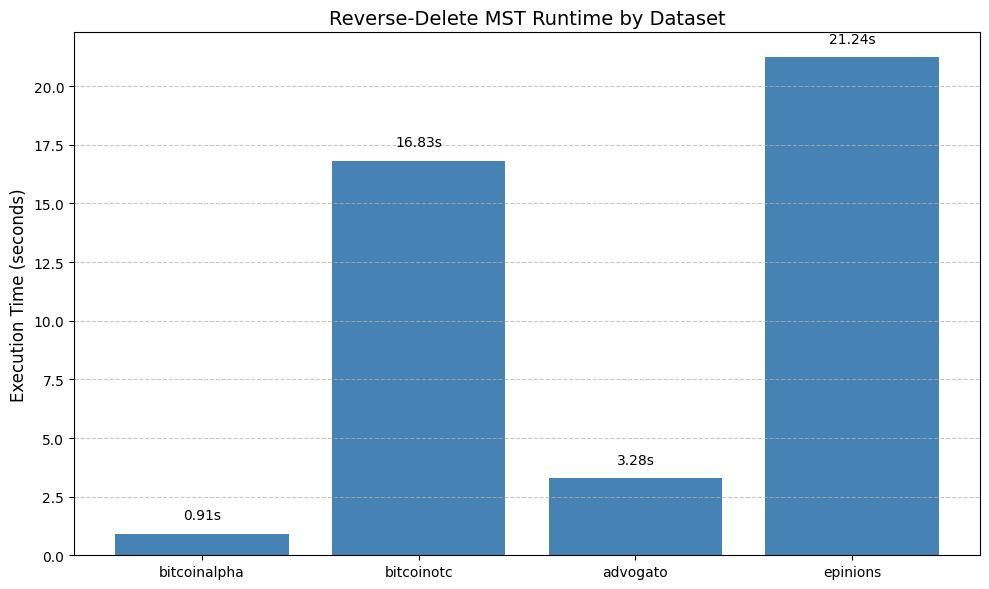

In [53]:
import matplotlib.pyplot as plt

# === Reverse-Delete MST Results ===
datasets = ["bitcoinalpha", "bitcoinotc", "advogato", "epinions"]
execution_times = [0.9065, 16.8255, 3.2823, 21.2363]

# === Plot Setup ===
fig, ax = plt.subplots(figsize=(10, 6))

# All bars now have the same color
bars = ax.bar(datasets, execution_times, color='steelblue')

# Add value labels above each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}s',
            ha='center', va='bottom', fontsize=10, color='black')

# === Labels and Title ===
ax.set_ylabel('Execution Time (seconds)', fontsize=12)
ax.set_title('Reverse-Delete MST Runtime by Dataset', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()